## Pandas Data ingestion examples from DataCamp exercises

From the 'Streamlined Data Ingestion with pandas' course found [here](https://learn.datacamp.com/courses/streamlined-data-ingestion-with-pandas)

In [1]:
# Import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Excel file ingestion

In [2]:
# Import excel file using read_excel - the file has been examined and has two extraneous rows at the beginning.
survey_data = pd.read_excel("data/fcc-new-coder-survey.xlsx",
                           skiprows=2,
                           usecols="W:AB, AR")

In [3]:
survey_data.head()

,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,Income
0,35.0,United States of America,United States of America,office and administrative support,NaN,Employed for wages,32000.0
1,90.0,United States of America,United States of America,food and beverage,NaN,Employed for wages,15000.0
2,45.0,United States of America,United States of America,finance,NaN,Employed for wages,48000.0
3,45.0,United States of America,United States of America,"arts, entertainment, sports, or media",NaN,Employed for wages,43000.0
4,10.0,United States of America,United States of America,education,NaN,Employed for wages,6000.0


### Excel file has multiple sheets '2016' and '2017'

The first sheet was selected by default. We also want the second sheet. This can be achieved by passing the parameter 'sheet_name' and either the sheet number (it is zero indexed) or the sheet name.

In [4]:
# Get the second sheet by poistion index
survey_data_sheet2 = pd.read_excel('data/fcc-new-coder-survey.xlsx',
                                   skiprows=2,
                                  sheet_name = 1)
# Get the second sheet by name
survey_data_2017 = pd.read_excel('data/fcc-new-coder-survey.xlsx',
                                 skiprows=2,
                                sheet_name='2017')

In [5]:
# Check if both dataframes are the same
survey_data_sheet2.equals(survey_data_2017)

True

In [6]:
survey_data_2017.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,ResourcePluralSight,ResourceSkillCrush,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,SchoolDegree,SchoolMajor,StudentDebtOwe
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,bachelor's degree,Information Technology,NaN


<AxesSubplot:ylabel='JobPref'>

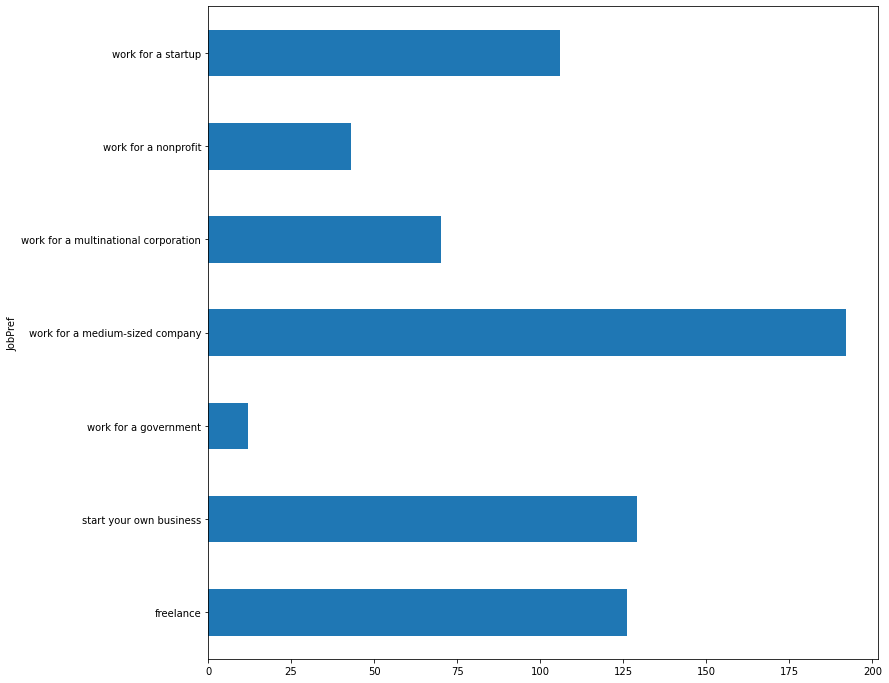

In [7]:
# Graph where people would like to get a developer job
job_prefs = survey_data_2017.groupby("JobPref").JobPref.count()
fig, ax = plt.subplots(figsize=(12,12))
job_prefs.plot.barh()

### Loading all sheets

In [8]:
# Load all sheets available by setting parameter 'sheet_name'=None
survey_responses = pd.read_excel('data/fcc-new-coder-survey.xlsx',
                                sheet_name=None)

In [9]:
# Check type of object returned
print(type(survey_responses))

<class 'dict'>


In [10]:
# Iterate through the dictionary returned and review the key/value pairs
for key, value in survey_responses.items():
    print(f"key: {key}, value: {type(value)}")

key: 2016, value: <class 'pandas.core.frame.DataFrame'>
key: 2017, value: <class 'pandas.core.frame.DataFrame'>


In [11]:
# Combine them into one DataFrame

# Create empty DataFrame to hold all loaded sheets
all_responses = pd.DataFrame()

In [12]:
# Iterate through DataFrames in dictionary
for sheet_name, frame in survey_responses.items():
    # Add a column so we know which year data is from
    frame["Year"] = sheet_name
    
    # Add each DataFrame to all_responses
    all_responses = all_responses.append(frame)

In [13]:
# View years in data
print(all_responses.Year.unique())

['2016' '2017']
